In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import plotly as py
import math
import time
from itertools import cycle, islice
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder, MinMaxScaler
import tensorflow as tf
from sklearn.metrics import r2_score
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [2]:
df = pd.read_csv('independent_expenditures_2004-2020.csv', low_memory=False)
df

,Unnamed: 0,report_year,image_number,file_number,payee_name,expenditure_date,dissemination_date,expenditure_amount,category_code_full,support_oppose_indicator,...,filing_form,link_id,payee_prefix,payee_suffix,is_notice,memo_text,filer_prefix,filer_suffix,schedule_type,pdf_url
0,0,2020,2.020100e+17,1444283.0,Good Works Matters,5-Oct-20,NaN,35000.00,Phone bankers for federal candidate,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020,2.020100e+17,1445692.0,A/B Partners,8-Sep-20,8-Oct-20,85262.15,Digital ads,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020,2.020100e+17,1466866.0,"BERLIN ROSEN, LTD",15-Oct-20,25-Oct-20,80000.00,Projected phone bank costs,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020,2.020100e+17,1466866.0,CENTURY DIRECT LLC,19-Oct-20,25-Oct-20,3742.00,Mailer,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020,2.020110e+17,1470736.0,AB PARTNERS PBC,31-Oct-20,31-Oct-20,48093.24,Digital ads,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492849,413232,2008,2.803986e+10,387136.0,"JIMENEZ, VIRGINIA P",2008-10-13 00:00:00,NaN,250.00,NaN,S,...,F5,1.101520e+18,NaN,NaN,t,NaN,NaN,NaN,SE-F57,http://docquery.fec.gov/cgi-bin/fecimg/?280398...
492850,413233,2008,2.803986e+10,387136.0,RACKSPACE MANAGED HOSTING,2008-10-05 00:00:00,NaN,105.00,NaN,S,...,F5,1.101520e+18,NaN,NaN,t,NaN,NaN,NaN,SE-F57,http://docquery.fec.gov/cgi-bin/fecimg/?280398...
492851,413234,2008,2.803986e+10,387136.0,APLUSNET,2008-09-15 00:00:00,NaN,74.00,NaN,S,...,F5,1.101520e+18,NaN,NaN,t,NaN,NaN,NaN,SE-F57,http://docquery.fec.gov/cgi-bin/fecimg/?280398...
492852,413235,2008,2.803991e+10,387138.0,FEMINIST MAJORITY,2008-10-31 00:00:00,NaN,417.00,NaN,S,...,F5,1.110320e+18,NaN,NaN,t,NaN,NaN,NaN,SE-F57,http://docquery.fec.gov/cgi-bin/fecimg/?280399...


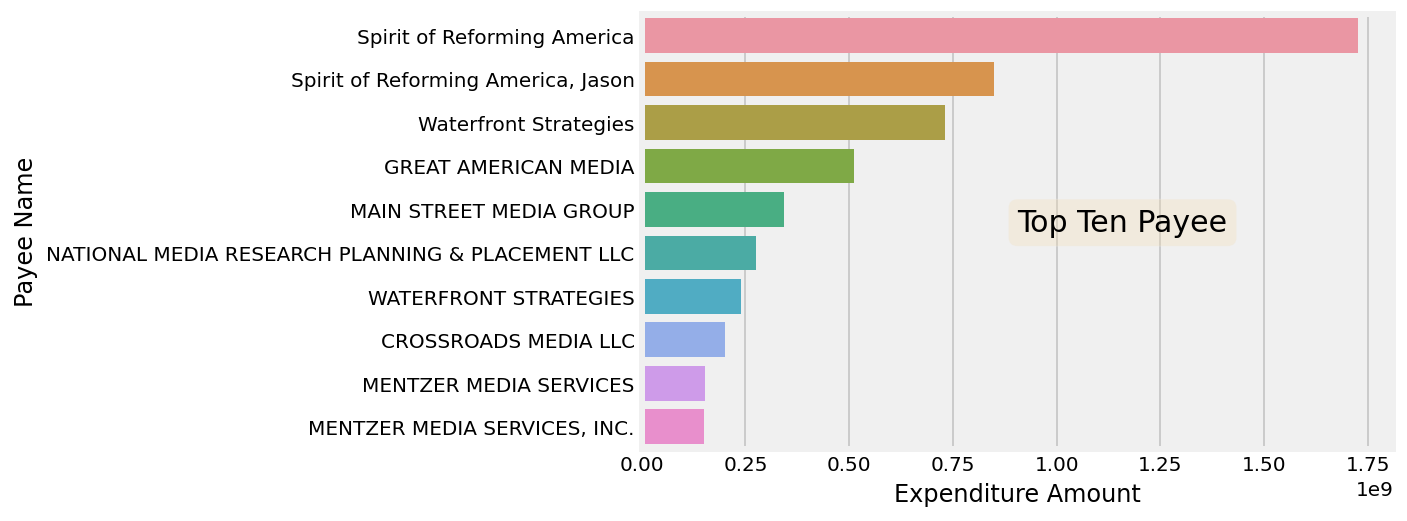

In [3]:
table_count = df.groupby(df['payee_name'])['expenditure_amount'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
payee_index = table_count.index
payee_val = table_count.values
sns.barplot(x = payee_val,y=payee_index,orient='h')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
plt.annotate("Top Ten Payee", xy=(0.5, 0.5), fontsize=15, xycoords='axes fraction', bbox=props)
plt.ylabel('Payee Name')
plt.xlabel('Expenditure Amount')
plt.show()

Text(0, 0.5, 'Count')

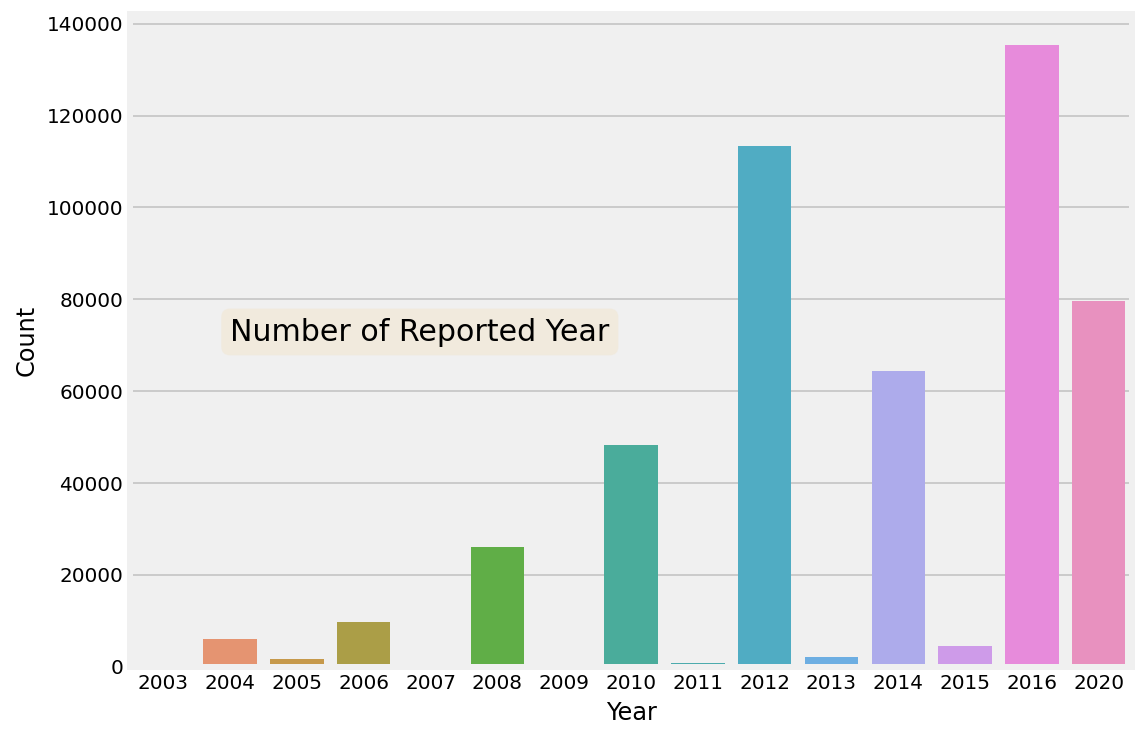

In [4]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(df.report_year,ax=ax)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
plt.annotate("Number of Reported Year", xy=(0.1, 0.5), fontsize=15, xycoords='axes fraction', bbox=props)
plt.xlabel('Year')
plt.ylabel('Count')

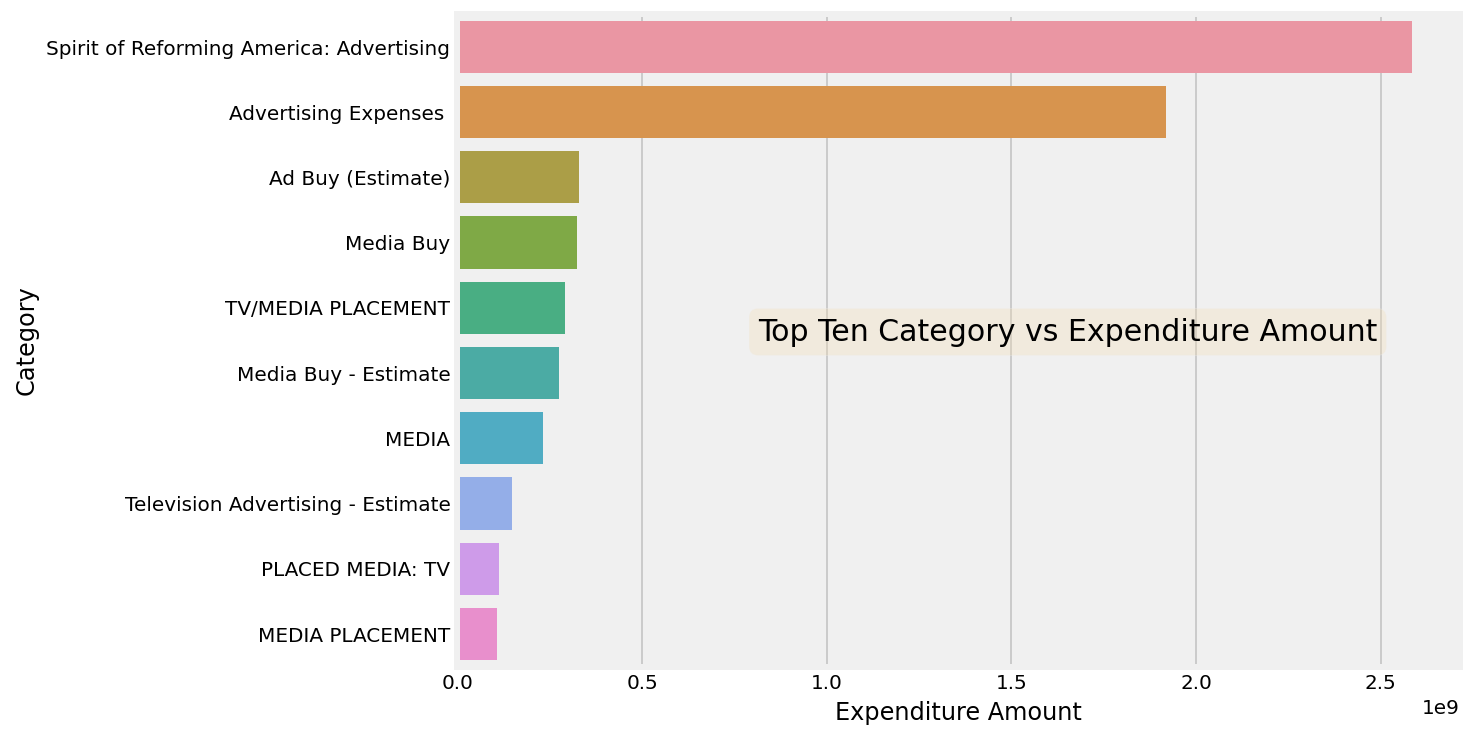

In [5]:
table_count = df.groupby(df.category_code_full)['expenditure_amount'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
category_code_idx = table_count.index
category_code_val = table_count.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = category_code_val,y=category_code_idx,orient='h')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
plt.annotate("Top Ten Category vs Expenditure Amount", xy=(0.3, 0.5), fontsize=15, xycoords='axes fraction', bbox=props)
plt.ylabel('Category')
plt.xlabel('Expenditure Amount')
plt.show()

Text(0.5, 0, 'Count')

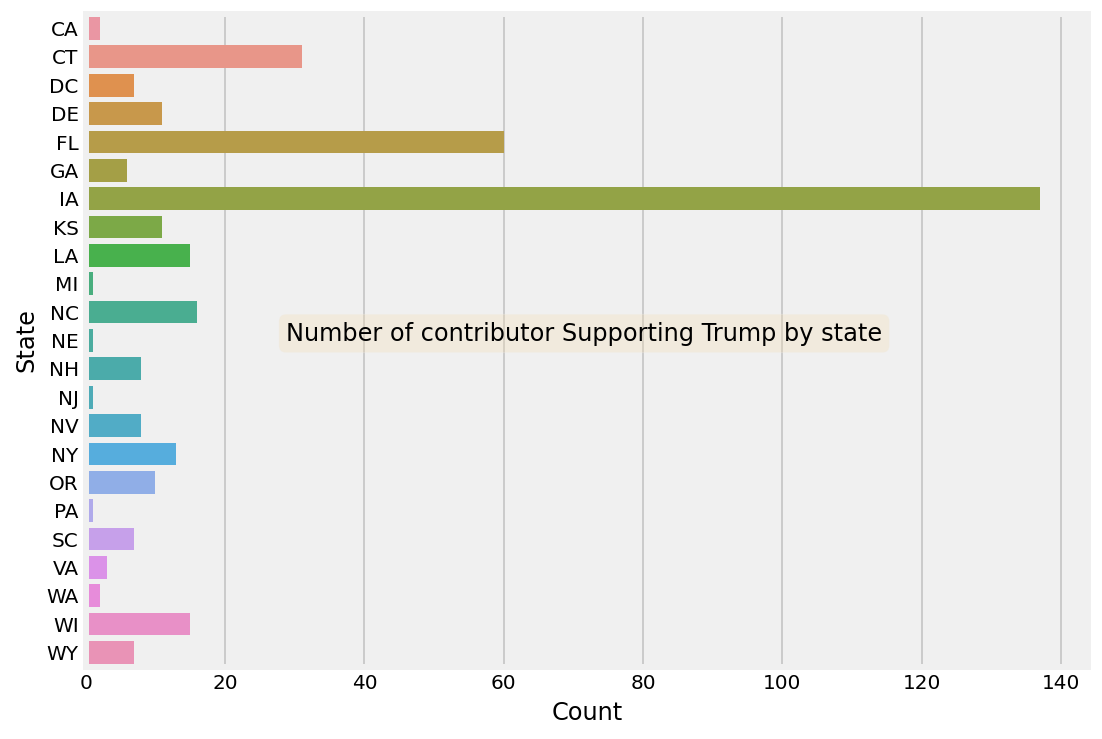

In [6]:
df1 = df[df['candidate_name'].notna()]
support =['S','SUP']
words = ["TRUMP", "Trump"]
for i in range(len(words)):
    trump_entry = df1[df1.candidate_name.str.contains(words[i])]
trump_entry = trump_entry[trump_entry.support_oppose_indicator.isin(support)]
trump_state = trump_entry.groupby(trump_entry.cand_office_state)\
              [['cand_office_state','support_oppose_indicator']].size()
trump_index = trump_state.index
trump_val = trump_state.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = trump_val,y=trump_index,orient='h',ax=ax)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
plt.annotate("Number of contributor Supporting Trump by state", xy=(0.2, 0.5), fontsize=12, xycoords='axes fraction', bbox=props)
plt.ylabel('State')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

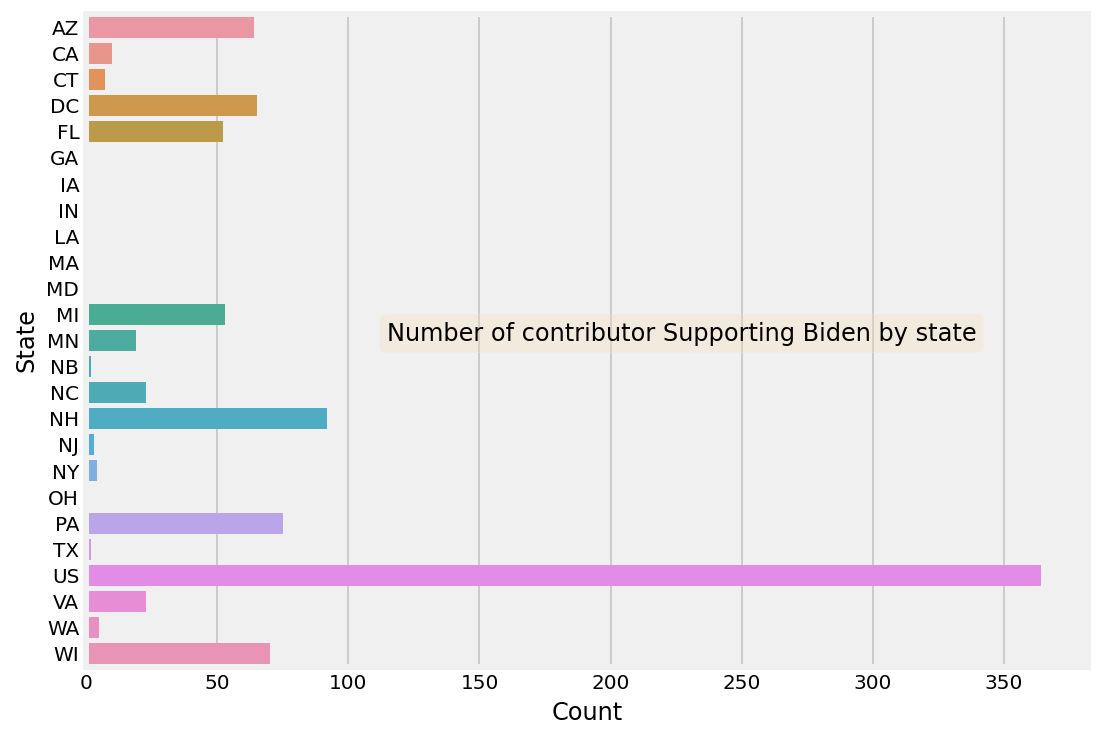

In [7]:
df2 = df[df['candidate_name'].notna()]
support =['S','SUP']
words = ["BIDEN", "Biden"]
#biden_entry = df[df.candidate_name == 'Biden, Joseph']
for i in range(len(words)):
    biden_entry = df2[df2.candidate_name.str.contains(words[i])]
biden_entry = biden_entry[biden_entry.support_oppose_indicator.isin(support)]
#biden_state = biden_entry[(biden_entry[['cand_office_state']] != 0).all(axis=1)]
#biden_state = biden_entry.loc[biden_entry['cand_office_state']!=0].dropna()
biden_state = biden_entry.dropna(subset=['cand_office_state'])
biden_state = biden_state[(biden_state[['cand_office_state']] != '0').all(axis=1)]
biden_state = biden_state.groupby(biden_state.cand_office_state)\
              [['cand_office_state','support_oppose_indicator']].size()
biden_index = biden_state.index
biden_val = biden_state.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = biden_val,y=biden_index,orient='h',ax=ax)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
plt.annotate("Number of contributor Supporting Biden by state", xy=(0.3, 0.5), fontsize=12, xycoords='axes fraction', bbox=props)
plt.ylabel('State')
plt.xlabel('Count')


Text(0.5, 0, 'Candidate')

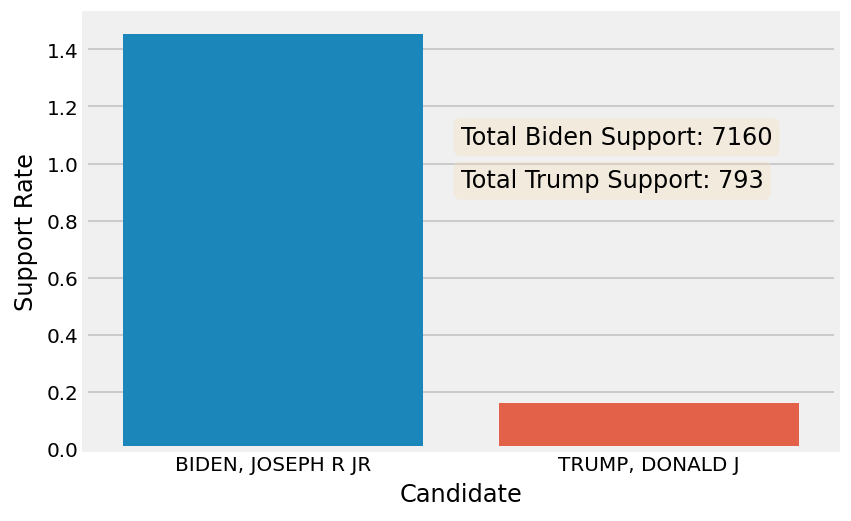

In [8]:
#Trump
df1 = df[df['candidate_name'].notna()]
support =['S','SUP']
word1 = ["TRUMP", "Trump"]
for i in range(len(words)):
    trump_entry = df1[df1.candidate_name.str.contains(word1[i])]
trump_entry = trump_entry[trump_entry.support_oppose_indicator.isin(support)]
#Biden
df2 = df[df['candidate_name'].notna()]
support =['S','SUP']
word2 = ["BIDEN", "Biden"]
for i in range(len(words)):
    biden_entry = df2[df2.candidate_name.str.contains(word2[i])]
biden_entry = biden_entry[biden_entry.support_oppose_indicator.isin(support)]

total_trump = len(trump_entry)
total_biden = len(biden_entry)
total = len(df.cand_office_state)
rate_trump = total_trump/total * 100
rate_biden = total_biden/total * 100
support_rate_list = [rate_biden, rate_trump]
candidate = ['BIDEN, JOSEPH R JR', 'TRUMP, DONALD J']
support_prob = pd.DataFrame({'Candidate':candidate,'Support Rate':support_rate_list})
sns.barplot(data=support_prob,x='Candidate',y='Support Rate')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
plt.annotate(f"Total Biden Support: {total_biden}", xy=(0.5, 0.7), fontsize=12, xycoords='axes fraction', bbox=props)
plt.annotate(f"Total Trump Support: {total_trump}", xy=(0.5, 0.6), fontsize=12, xycoords='axes fraction', bbox=props)
plt.ylabel('Support Rate')
plt.xlabel('Candidate')




In [9]:
columns = ['report_year', 'image_number', 'file_number', 'payee_name', 'expenditure_date', 'dissemination_date', 'expenditure_amount', 'category_code_full', 'support_oppose_indicator', 'candidate_id', 'candidate_name', 'cand_office_state', 'cand_office_district', 
'election_type', 'sub_id']
df = df[columns]
df = df.dropna()
df =  df.fillna(0)
df

,report_year,image_number,file_number,payee_name,expenditure_date,dissemination_date,expenditure_amount,category_code_full,support_oppose_indicator,candidate_id,candidate_name,cand_office_state,cand_office_district,election_type,sub_id
19,2020,2.020100e+17,1445692.0,A/B Partners,8-Sep-20,8-Oct-20,168.75,Digital ad setup,S,H8TX23121,"JONES, GINA ORTIZ",TX,23,G,C00348540
20,2020,2.020100e+17,1445692.0,A/B Partners,8-Sep-20,8-Oct-20,8979.00,Digital ads,S,H8TX23121,"JONES, GINA ORTIZ",TX,23,G,C00348540
21,2020,2.020100e+17,1445692.0,A/B Partners,8-Sep-20,8-Oct-20,6398.25,Digital ads,S,H0TX02106,"LADJEVARDIAN, SIMA JANDAGHI",TX,2,G,C00348540
22,2020,2.020100e+17,1445692.0,A/B Partners,8-Sep-20,8-Oct-20,168.75,Digital ad setup,S,H0TX02106,"LADJEVARDIAN, SIMA JANDAGHI",TX,2,G,C00348540
23,2020,2.020100e+17,1445692.0,A/B Partners,8-Sep-20,8-Oct-20,10634.98,Digital ads,S,H8FL26039,"MUCARSEL-POWELL, DEBBIE",FL,26,G,C00348540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79598,2020,2.020120e+17,1482635.0,AFT Solidarity 527,9-Dec-20,9-Dec-20,695.23,Canvassing Services (In-kind),S,S0GA00559,"Warnock, Raphael",GA,0,O,C00759597
79599,2020,2.020120e+17,1482635.0,AFSCME Special Account,8-Dec-20,8-Dec-20,1318.06,Canvassing Services (In-kind),S,S0GA00559,"Warnock, Raphael",GA,0,O,C00759597
79600,2020,2.020120e+17,1482635.0,AFSCME Special Account,9-Dec-20,9-Dec-20,1318.06,Canvassing Services (In-kind),S,S0GA00559,"Warnock, Raphael",GA,0,O,C00759597
79601,2020,2.020120e+17,1482635.0,AFL-CIO COPE Treasury,9-Dec-20,9-Dec-20,1788.88,Canvassing Services (In-kind),S,S0GA00559,"Warnock, Raphael",GA,0,O,C00759597


In [10]:
# Create category_columns and numeric_columns variables
numeric_columns = []
category_columns = []
for col in df.columns:
    if is_string_dtype(df[col]) == True:
        category_columns.append(col)
    elif is_numeric_dtype(df[col]) == True:
        numeric_columns.append(col)
print(numeric_columns)
print(category_columns)

['report_year', 'image_number', 'file_number', 'expenditure_amount']
['payee_name', 'expenditure_date', 'dissemination_date', 'category_code_full', 'support_oppose_indicator', 'candidate_id', 'candidate_name', 'cand_office_state', 'cand_office_district', 'election_type', 'sub_id']


In [11]:
# Create dummy variables for the category_columns and merge on the numeric_columns to create an X dataset
category_columns = pd.get_dummies(df[category_columns])
X = df[numeric_columns].merge(category_columns, left_index= True, right_index= True)
X

,report_year,image_number,file_number,expenditure_amount,payee_name_ Saguaro Strategies LLC,"payee_name_1 TV, Inc.",payee_name_104.5 WSLD,payee_name_1199 SEIU United Healthcare Workers East,payee_name_16 C Communications,payee_name_1600 Strategies,...,sub_id_C00762872,sub_id_C00763185,sub_id_C00763409,sub_id_C00763474,sub_id_C00763698,sub_id_C00763730,sub_id_C00763870,sub_id_C00764779,sub_id_C90011172,sub_id_C90019209
19,2020,2.020100e+17,1445692.0,168.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,2020,2.020100e+17,1445692.0,8979.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,2020,2.020100e+17,1445692.0,6398.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,2020,2.020100e+17,1445692.0,168.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,2020,2.020100e+17,1445692.0,10634.98,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79598,2020,2.020120e+17,1482635.0,695.23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79599,2020,2.020120e+17,1482635.0,1318.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79600,2020,2.020120e+17,1482635.0,1318.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79601,2020,2.020120e+17,1482635.0,1788.88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = X.fillna(0)
X

,report_year,image_number,file_number,expenditure_amount,payee_name_ Saguaro Strategies LLC,"payee_name_1 TV, Inc.",payee_name_104.5 WSLD,payee_name_1199 SEIU United Healthcare Workers East,payee_name_16 C Communications,payee_name_1600 Strategies,...,sub_id_C00762872,sub_id_C00763185,sub_id_C00763409,sub_id_C00763474,sub_id_C00763698,sub_id_C00763730,sub_id_C00763870,sub_id_C00764779,sub_id_C90011172,sub_id_C90019209
19,2020,2.020100e+17,1445692.0,168.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,2020,2.020100e+17,1445692.0,8979.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,2020,2.020100e+17,1445692.0,6398.25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,2020,2.020100e+17,1445692.0,168.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,2020,2.020100e+17,1445692.0,10634.98,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79598,2020,2.020120e+17,1482635.0,695.23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79599,2020,2.020120e+17,1482635.0,1318.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79600,2020,2.020120e+17,1482635.0,1318.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79601,2020,2.020120e+17,1482635.0,1788.88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y = df['expenditure_amount'].values

In [14]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Scale X_train and X_test
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
len(X_train_scaled[0])

9665

In [16]:
# Create a neural network model with keras
nn = tf.keras.models.Sequential()
# Add a hidden layer with twice as many neurons as there are inputs. Use 'relu'
n_input = len(X_train_scaled[0])
n_hidden = n_input 
n_hidden_layer2 = n_input
nn.add(tf.keras.layers.Dense(units=n_hidden, input_dim=n_input, activation='relu'))
nn.add(tf.keras.layers.Dense(units=n_hidden_layer2, activation='relu'))
# add an output layer with a 'linear' activation function.
nn.add(tf.keras.layers.Dense(units=1,  activation='linear'))

In [17]:
# print a summary of the model
nn.summary()
# compile the model using the "adam" optimizer and "mean_squared_error" loss function
nn.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9665)              93421890  
_________________________________________________________________
dense_1 (Dense)              (None, 9665)              93421890  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9666      
Total params: 186,853,446
Trainable params: 186,853,446
Non-trainable params: 0
_________________________________________________________________


In [18]:
# train the model for 100 epochs
model = nn.fit(X_train_scaled, y_train, epochs=50)

Train on 30032 samples
Epoch 1/50
30032/30032 [==============================] - 3132s 104ms/sample - loss: 48117066339221.2656 - mse: 48117084848128.0000
Epoch 2/50
30032/30032 [==============================] - 3529s 117ms/sample - loss: 47947254116072.4062 - mse: 47947207147520.0000
Epoch 3/50
30032/30032 [==============================] - 2638s 88ms/sample - loss: 47630435575260.2500 - mse: 47630415560704.0000
Epoch 4/50
30032/30032 [==============================] - 2630s 88ms/sample - loss: 47145339953078.8359 - mse: 47145268805632.0000
Epoch 5/50
30032/30032 [==============================] - 2615s 87ms/sample - loss: 46426333142449.5781 - mse: 46426314768384.0000
Epoch 6/50
30032/30032 [==============================] - 2668s 89ms/sample - loss: 45458457670110.7422 - mse: 45458437177344.0000
Epoch 7/50
30032/30032 [==============================] - 2637s 88ms/sample - loss: 44268529922668.4844 - mse: 44268504743936.0000
Epoch 8/50
30032/30032 [==============================] - 

In [19]:
# predict values for the train and test sets
y_train_pred = nn.predict(X_train_scaled)
y_test_pred = nn.predict(X_test_scaled)

In [20]:
# score the training predictions with r2_score()
r2_score(y_train, y_train_pred)

0.9991990876693556

In [21]:
# score the test predictions with r2_score()
r2_score(y_test, y_test_pred)

0.8145582287092288